In [1]:
import numpy
import pandas as pd
from sklearn import preprocessing
numpy.random.seed(10)

In [2]:
all_df = pd.read_excel("data/titanic3.xls")

In [3]:
cols=['survived','name','pclass' ,'sex', 'age', 'sibsp',
      'parch', 'fare', 'embarked']
all_df=all_df[cols]

In [4]:
msk = numpy.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]

In [5]:
print('total:',len(all_df),
      'train:',len(train_df),
      'test:',len(test_df))

total: 1309 train: 1034 test: 275


In [6]:
def PreprocessData(raw_df):
    df=raw_df.drop(['name'], axis=1)
    age_mean = df['age'].mean()
    df['age'] = df['age'].fillna(age_mean)
    fare_mean = df['fare'].mean()
    df['fare'] = df['fare'].fillna(fare_mean)
    df['sex']= df['sex'].map({'female':0, 'male': 1}).astype(int)
    x_OneHot_df = pd.get_dummies(data=df,columns=["embarked" ])

    ndarray = x_OneHot_df.values
    Features = ndarray[:,1:]
    Label = ndarray[:,0]

    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    scaledFeatures=minmax_scale.fit_transform(Features)    
    
    return scaledFeatures,Label

In [7]:
train_Features,train_Label=PreprocessData(train_df)
test_Features,test_Label=PreprocessData(test_df)

In [8]:
train_Features[:2]

array([[0.        , 0.        , 0.38844819, 0.        , 0.        ,
        0.41250333, 0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.00679502, 0.125     , 0.22222222,
        0.2958059 , 0.        , 0.        , 1.        ]])

In [9]:
test_Features[:2]

array([[0.        , 0.        , 0.22338172, 0.125     , 0.        ,
        0.44409922, 1.        , 0.        , 0.        ],
       [0.        , 1.        , 1.        , 0.        , 0.        ,
        0.0585561 , 0.        , 0.        , 1.        ]])

In [10]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

Using TensorFlow backend.


In [11]:
model = Sequential()

In [12]:
model.add(Dense(units=40, input_dim=9, 
                kernel_initializer='uniform', 
                activation='relu'))

In [13]:
model.add(Dense(units=30, 
                kernel_initializer='uniform', 
                activation='relu'))

In [14]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [15]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [16]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=30,verbose=2)

Train on 930 samples, validate on 104 samples
Epoch 1/30
 - 1s - loss: 0.6899 - acc: 0.5774 - val_loss: 0.6705 - val_acc: 0.7885
Epoch 2/30
 - 0s - loss: 0.6677 - acc: 0.5989 - val_loss: 0.5914 - val_acc: 0.7885
Epoch 3/30
 - 0s - loss: 0.6098 - acc: 0.6677 - val_loss: 0.4945 - val_acc: 0.8173
Epoch 4/30
 - 0s - loss: 0.5453 - acc: 0.7613 - val_loss: 0.4629 - val_acc: 0.7788
Epoch 5/30
 - 0s - loss: 0.5058 - acc: 0.7613 - val_loss: 0.4543 - val_acc: 0.7885
Epoch 6/30
 - 0s - loss: 0.4904 - acc: 0.7645 - val_loss: 0.4395 - val_acc: 0.7788
Epoch 7/30
 - 0s - loss: 0.4817 - acc: 0.7602 - val_loss: 0.4419 - val_acc: 0.7885
Epoch 8/30
 - 0s - loss: 0.4784 - acc: 0.7581 - val_loss: 0.4344 - val_acc: 0.7981
Epoch 9/30
 - 0s - loss: 0.4726 - acc: 0.7634 - val_loss: 0.4270 - val_acc: 0.7981
Epoch 10/30
 - 0s - loss: 0.4693 - acc: 0.7785 - val_loss: 0.4250 - val_acc: 0.7981
Epoch 11/30
 - 0s - loss: 0.4653 - acc: 0.7656 - val_loss: 0.4217 - val_acc: 0.8173
Epoch 12/30
 - 0s - loss: 0.4637 - acc:

In [17]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

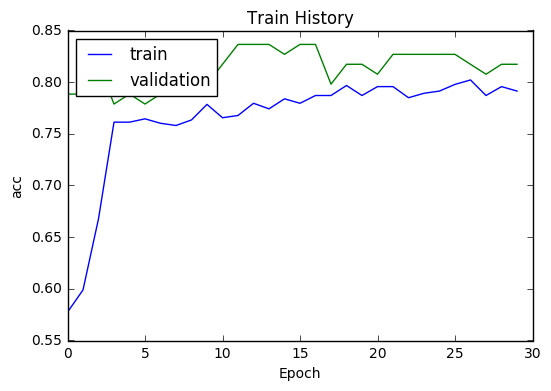

In [18]:
show_train_history(train_history,'acc','val_acc')

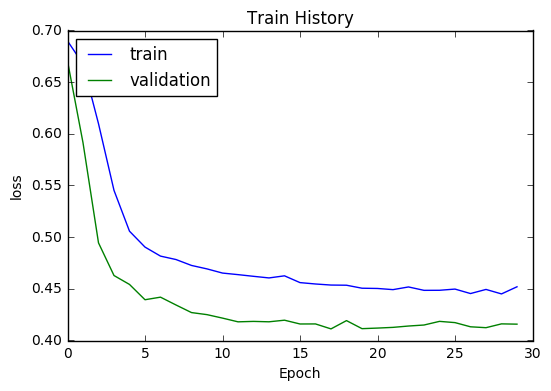

In [19]:
show_train_history(train_history,'loss','val_loss')

In [20]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

275/275 [==============================] - 0s 43us/step


In [21]:
scores[1]

0.8109090913425793